In [1]:
import numpy as np
from numpy.random import uniform
from numpy.random import normal
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X = uniform(0, 1, 100)
X.sort()
Y = np.sin(4*X) + normal(0, 1/3, 100)
x_real = np.linspace(0, 1, 100)
y_real = np.sin(4*x_real)

In [3]:
y_hat_30_nearest = np.zeros(y_real.shape)
y_hat_02_epa = np.zeros(y_real.shape)
y_hat_02_tri = np.zeros(y_real.shape)
for i in range(x_real.shape[0]):
    x0 = x_real[i]
    y_hat_30_nearest[i] = np.mean(Y[np.argsort(np.abs(X - x0))][:30])
    
    t = np.abs(X - x0)/0.2
    d = (t<=1)*3/4*(1-t**2)
    d3 = (t<=1)*(1-t**3)**3
    y_hat_02_epa[i] = np.sum(d*Y)/np.sum(d)
    y_hat_02_tri[i] = np.sum(d3*Y)/np.sum(d3)

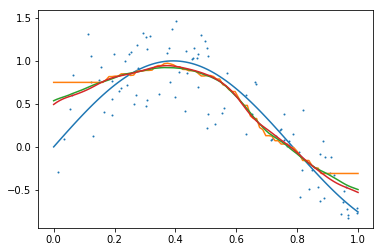

In [4]:
plt.plot(x_real, y_real)
plt.scatter(X, Y, s=1)
plt.plot(x_real, y_hat_30_nearest)
plt.plot(x_real, y_hat_02_epa)
plt.plot(x_real, y_hat_02_tri)

In [8]:
y_hat_lin = np.zeros(y_real.shape)
y_hat_sqr = np.zeros(y_real.shape)
B = np.hstack((np.ones(shape=(X.shape[0], 1)), np.expand_dims(X, axis=1)))
B2 = np.hstack((np.ones(shape=(X.shape[0], 1)), np.expand_dims(X, axis=1), np.expand_dims(X**2, axis=1)))
for i in range(x_real.shape[0]):
    x0 = x_real[i]
    t = np.abs(X - x0)/0.2
    d = (t<=1)*3/4*(1-t**2)
    Wx0 = np.diag(d)
    y_hat_lin[i] = np.array([1, x0]) @ np.linalg.inv(B.T @ Wx0 @ B) @ B.T @ Wx0 @ np.expand_dims(Y, axis=1)
    y_hat_sqr[i] = np.array([1, x0, x0**2]) @ np.linalg.inv(B2.T @ Wx0 @ B2) @ B2.T @ Wx0 @ np.expand_dims(Y, axis=1)

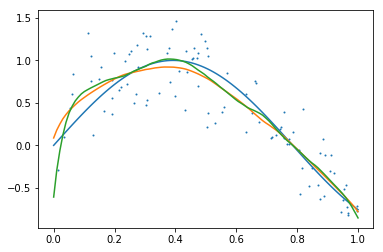

In [9]:
plt.plot(x_real, y_real)
plt.scatter(X, Y, s=1)
plt.plot(x_real, y_hat_lin)
plt.plot(x_real, y_hat_sqr)